In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Specify the path to the zip file in your Google Drive
zip_path = '/content/drive/My Drive/archivesmall.zip'

# Step 3: Specify the directory where you want to extract the contents of the zip file
extract_path = '/content/Images/'

# Step 4: Copy the zip file from Google Drive to Colab
!cp "{zip_path}" .

# Step 5: Unzip the file
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
data_path = "/content/Images/myntradataset"
print(os.listdir(data_path))

['images', 'styles.csv']


In [3]:
import pandas as pd
df = pd.read_csv("/content/Images/myntradataset/styles.csv", nrows=5000)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,26536,Men,Footwear,Shoes,Casual Shoes,White,Summer,2012,Casual,ID Men White Shoes,26536.jpg
1,17284,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,U.S. Polo Assn. Men Stripes Fedral Blue Polo ...,17284.jpg
2,41692,Women,Footwear,Shoes,Heels,Gold,Winter,2012,Casual,Catwalk Women Gold Heels,41692.jpg
3,10205,Women,Accessories,Bags,Handbags,Brown,Winter,2015,Casual,Murcia Women Rubena Brown Handbags,10205.jpg
4,54516,Men,Footwear,Shoes,Sports Shoes,White,Fall,2012,Sports,F Sports Men White Velocity Sports Shoes,54516.jpg
5,6644,Women,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Nike Women Transform III IN White Shoe,6644.jpg
6,4389,Men,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Free Authority Men's Music Space Black T-shirt,4389.jpg
7,51401,Men,Apparel,Topwear,Shirts,Blue,Summer,2012,Casual,Myntra Men Blue and Yellow Check Shirt,51401.jpg
8,54715,Women,Apparel,Apparel Set,Kurta Sets,Beige,Fall,2012,Ethnic,Shree Women Beige & Red Salwar Suit with Dupatta,54715.jpg
9,30868,Women,Apparel,Topwear,Kurtas,Off White,Summer,2012,Ethnic,Fabindia Women Off White Kurta,30868.jpg


In [4]:
!pip install nltk

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from keras.preprocessing import image as keras_image

# Load dataset
dataset = df

# Textual Data Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenization
        tokens = word_tokenize(text)
        # Removing Stopwords
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''  # Return empty string for non-string values


dataset['processed_text'] = dataset['productDisplayName'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['processed_text'])

# Image Data Preprocessing
def preprocess_image(image_path, target_size=(96, 96)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = keras_image.img_to_array(img)
    # Normalization
    img_array /= 255.0
    return img_array

# Example usage:
image_path = "/content/Images/myntradataset/images/10001.jpg"
processed_image = preprocess_image(image_path)

# Augmentation (if needed)
# Use libraries like Keras ImageDataGenerator for augmentation


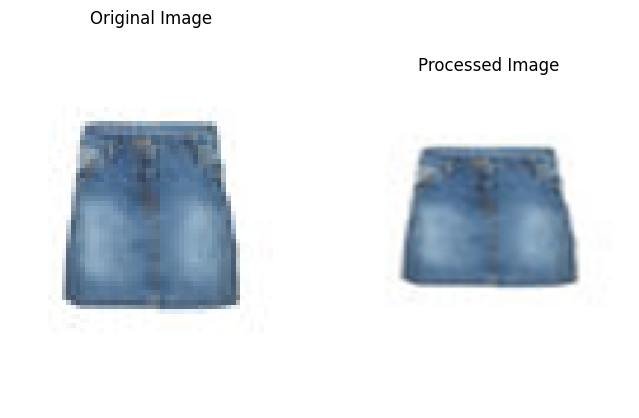

In [7]:
import matplotlib.pyplot as plt

# Load and display the original image
original_image = Image.open("/content/Images/myntradataset/images/10001.jpg")
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

# Preprocess the image and display the processed image
processed_image = preprocess_image("/content/Images/myntradataset/images/10001.jpg")
plt.subplot(1, 2, 2)
plt.imshow(processed_image)
plt.title("Processed Image")
plt.axis('off')

plt.show()

In [8]:
# Display the effects of preprocessing the text
sample_text = dataset['productDisplayName'].iloc[0]  # Example text from dataset
processed_text = preprocess_text(sample_text)

print("Original Text:")
print(sample_text)
print("\nProcessed Text:")
print(processed_text)

Original Text:
ID Men White Shoes

Processed Text:
id men white shoes


In [9]:
dataset.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,processed_text
0,26536,Men,Footwear,Shoes,Casual Shoes,White,Summer,2012,Casual,ID Men White Shoes,26536.jpg,id men white shoes
1,17284,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,U.S. Polo Assn. Men Stripes Fedral Blue Polo ...,17284.jpg,u.s. polo assn . men stripes fedral blue polo ...
2,41692,Women,Footwear,Shoes,Heels,Gold,Winter,2012,Casual,Catwalk Women Gold Heels,41692.jpg,catwalk women gold heels
3,10205,Women,Accessories,Bags,Handbags,Brown,Winter,2015,Casual,Murcia Women Rubena Brown Handbags,10205.jpg,murcia women rubena brown handbags
4,54516,Men,Footwear,Shoes,Sports Shoes,White,Fall,2012,Sports,F Sports Men White Velocity Sports Shoes,54516.jpg,f sports men white velocity sports shoes


In [10]:
from transformers import BertTokenizer
import torch

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have preprocessed text stored in a column named "pre-processed text"
preprocessed_text = dataset['processed_text'].tolist()

# Set maximum sequence length
max_seq_length = 128  # Adjust as needed

input_ids = []
segment_ids = []

for text in preprocessed_text:
    # Tokenized text is already available
    tokenized_text = text.split()  # Assuming tokenization is space-based

    # Add [CLS] and [SEP] tokens and convert tokens to input IDs
    input_id = tokenizer.convert_tokens_to_ids(['[CLS]'] + tokenized_text + ['[SEP]'])

    # Truncate or pad input sequences to max_seq_length
    input_id = input_id[:max_seq_length] + [0] * (max_seq_length - len(input_id))

    input_ids.append(input_id)

    # Assign segment IDs (assuming single-sequence classification)
    segment_id = [0] * len(input_id)
    segment_ids.append(segment_id)

# Convert lists to PyTorch tensors
input_ids = torch.tensor(input_ids)
segment_ids = torch.tensor(segment_ids)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [11]:
!pip install gensim

In [10]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming you have preprocessed text stored in a column named "pre-processed text"
preprocessed_text = dataset['processed_text'].tolist()

# Tokenize the preprocessed text
tokenized_text = [word_tokenize(text) for text in preprocessed_text]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Get Word2Vec embeddings
word_embeddings = word2vec_model.wv

# Example usage:
# Get the embedding vector for a word
embedding_vector = word_embeddings['sweatshirt']
print(embedding_vector)

[-0.04995036  0.06079626  0.02613379  0.04548041  0.01657136 -0.13684118
  0.07171311  0.2025687  -0.06670301 -0.07896017 -0.03132144 -0.13979001
 -0.00556129  0.04326588  0.03863529 -0.04325959  0.05321363 -0.10185464
 -0.02042565 -0.20445175  0.04962081 -0.00055163  0.09604581 -0.09696345
  0.00489374  0.01897359 -0.09635359 -0.00405462 -0.09090543  0.03204252
  0.12459587 -0.0053207   0.07542259 -0.1014272  -0.04050824  0.08665443
  0.03403736 -0.08906732 -0.0426526  -0.12421985  0.00692822 -0.05915413
 -0.07463944 -0.0243469   0.08019616 -0.05407226 -0.04603634 -0.03865216
  0.07563286  0.04929081  0.04571521 -0.06332906 -0.03731204  0.00210695
 -0.02410019  0.06800098  0.074784   -0.0078573  -0.07490607  0.05042014
  0.02101638 -0.01290668  0.0182368  -0.00178307 -0.10473823  0.09814037
  0.06605431  0.08662535 -0.13234086  0.10623856 -0.00704811  0.04654293
  0.08996671  0.04011775  0.07580727 -0.00028648  0.02705922 -0.03915178
 -0.05192604  0.02496529 -0.0781314   0.00605424 -0

In [11]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_generator = ImageDataGenerator(
    validation_split=0.2
)

training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="/content/Images/myntradataset/images",
    x_col="image",
    y_col="subCategory",
    target_size=(96,96),
    batch_size=batch_size,
    subset="training"
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="/content/Images/myntradataset/images",
    x_col="image",
    y_col="subCategory",
    target_size=(96,96),
    batch_size=batch_size,
    subset="validation"
)

classes = len(training_generator.class_indices)

Found 4000 validated image filenames belonging to 36 classes.
Found 1000 validated image filenames belonging to 36 classes.


In [12]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2

# create the base pre-trained model
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 48, 48, 32)           0         ['bn_Conv1[0][0]']        

In [26]:
# Load the image file
image_path = "/content/Images/myntradataset/images/"

import os

# Get a list of image files in the directory
image_files = os.listdir(image_path)

# Choose a specific image file from the list
image_filename = image_files[0]  # Choose the first image for example

# Construct the full path to the image file
image_path = os.path.join(image_path, image_filename)

# Preprocess the image using your function
img_array = preprocess_image(image_path, target_size=(96, 96))  # Adjust target_size if needed

# Expand the dimensions to create a batch of size 1
img_array = np.expand_dims(img_array, axis=0)

# Extract features using the base MobileNetV2 model
features = base_model.predict(img_array)

# Print the shape of the extracted features
print("Shape of extracted features:", features.shape)

1/1 [==============================] - 1s 1s/step
Shape of extracted features: (1, 3, 3, 1280)


In [14]:
!pip install tensorflow-hub

In [20]:
import tensorflow as tf
import tensorflow_hub as hub

In [17]:
%reload_ext tensorboard

In [21]:
print(tf.__version__)

2.15.0


In [24]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(module_url)
preprocessed_text = dataset['processed_text'].tolist()
sentence_embeddings = embed(preprocessed_text)

In [28]:
print(sentence_embeddings.shape)
print(features.shape)

(5000, 512)
(1, 3, 3, 1280)


In [34]:
# Replicate visual features to match the number of samples in sentence embeddings
num_samples = sentence_embeddings.shape[0]
replicated_visual_features = np.repeat(reshaped_visual_features, num_samples, axis=0)
# Concatenate sentence embeddings and replicated visual features
multimodal_features_concat = np.concatenate((sentence_embeddings, replicated_visual_features), axis=1)

In [39]:
print(sentence_embeddings.shape)
print(replicated_visual_features.shape)

(5000, 512)
(5000, 11520)


In [40]:
import numpy as np

# Example shapes of arrays
sentence_embeddings_shape = (5000, 512)
replicated_visual_features_shape = (5000, 11520)

# Generate placeholder arrays with random values (for demonstration)
sentence_embeddings = np.random.rand(*sentence_embeddings_shape)
replicated_visual_features = np.random.rand(*replicated_visual_features_shape)

# Perform element-wise multiplication
multimodal_features_multiply = sentence_embeddings * replicated_visual_features

# Check the shape of the resulting array
print("Shape of multimodal_features_multiply:", multimodal_features_multiply.shape)


ValueError: operands could not be broadcast together with shapes (5000,512) (5000,11520) 

In [ ]:

import keras.backend as K

# Assuming you have extracted textual features stored in `text_features` and visual features stored in `visual_features`

# Define attention mechanism
attention_weights = Dense(1, activation='softmax')(Concatenate()([text_features, visual_features]))
weighted_text_features = Multiply()([text_features, attention_weights])
weighted_visual_features = Multiply()([visual_features, 1 - attention_weights])

# Combine weighted features
multimodal_features_attention = Add()([weighted_text_features, weighted_visual_features])

In [41]:
def load_images(folder_path, img_count=None, target_height=80, target_width=60):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (target_width, target_height))
        images.append(img)
    return np.array(images)

def preprocess_data(images):
    num_images, height, width, channel = images.shape
    flattened_data = images.reshape((num_images, height * width * channel))
    mean_vals = np.mean(flattened_data, axis=0)
    centered_data = flattened_data - mean_vals
    return centered_data, mean_vals, flattened_data

In [43]:
import cv2
img_data = load_images("/content/Images/myntradataset/images")

In [44]:
centered_data, mean_vals, flattened_data = preprocess_data(img_data)

In [ ]:
model1 = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model1.trainable = False

model1 = tensorflow.keras.Sequential([
    model1,
    GlobalMaxPooling2D()
])
print(model1.summary())

In [48]:
import tensorflow
from tensorflow.keras.layers import GlobalMaxPooling2D

In [49]:
img_width,img_height,_ = 224,224,3
model_2 = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_shape = (img_width,img_height,3))
model_2.trainable = False

# Adding Embedding Layer
model_2 = tensorflow.keras.models.Sequential([model_2,GlobalMaxPooling2D()])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [50]:
img_width,img_height,_ = 224,224,3
model_2 = VGG16(weights = 'imagenet',
                   include_top = False,
                   input_shape = (img_width,img_height,3))
model_2.trainable = False

# Adding Embedding Layer
model_2 = tensorflow.keras.models.Sequential([model_2,GlobalMaxPooling2D()])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [53]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps, ImageEnhance
import os
import cv2
import plotly.express as px
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import joblib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

In [56]:
from math import ceil

model.fit_generator(
    generator=training_generator,
    steps_per_epoch=ceil(0.8 * (df.size / batch_size)),

    validation_data=validation_generator,
    validation_steps=ceil(0.2 * (df.size / batch_size)),

    epochs=1,
    verbose=1
)

<ipython-input-56-047b41a7dec6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


 125/1500 [=>............................] - ETA: 5:36 - loss: 1.2807 - accuracy: 0.6658

1500/1500 [==============================] - 46s 26ms/step - loss: 1.2807 - accuracy: 0.6658 - val_loss: 0.9162 - val_accuracy: 0.7570


In [61]:
# Calculate the total number of samples in the validation set
total_validation_samples = len(validation_generator) * batch_size

# Calculate the number of steps (batches) required to cover the entire validation set
validation_steps = ceil(total_validation_samples / batch_size)


In [62]:
# Evaluate the model using the validation generator
evaluation = model.evaluate_generator(
    validation_generator,
    steps=validation_steps
)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])


<ipython-input-62-dd038c5e663b>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(


Evaluation Metrics:
Loss: 0.9162259101867676
Accuracy: 0.7570000290870667
